# **MySQL Architecture**


- 다중 스레드 아키텍처를 사용.
  - 이는 데이터베이스 서버가 여러 개의 작업을 동시에 수행할 수 있도록 하며, 따라서 처리 속도를 향상
- InnoDB와 같은 트랜잭션 지원 스토리지 엔진을 사용.
  - 이를 통해 MySQL은 데이터 무결성을 보장하고 트랜잭션 처리를 위한 기능을 제공.
- 여러 개의 스토리지 엔진을 지원.
  - 이는 사용자가 자신의 요구 사항에 맞는 스토리지 엔진을 선택할 수 있도록 하여 유연성을 제공.
- 고성능 데이터베이스 시스템을 구축할 수 있는 많은 옵션과 기능을 제공.
  - 이는 데이터베이스 관리자가 성능과 안정성을 최적화하고 자신의 요구 사항에 맞는 구성을 구축
- 오픈 소스 데이터베이스 시스템으로 전 세계의 개발자들이 함께 개발하고 유지보수
  - 이는 MySQL을 빠르게 개선하고 업그레이드하며, 더 많은 기능과 성능을 추가


**MySQL 서버는 크게 MySQL Engine과 Storage Enigne으로 구분**

- MySQL Engine: 요청된 SQL 문장을 분석하거나 최적화 등 처리. 논리적인 면에서 두뇌의 역할
- Storage Engine: 손발 역할. 실제 데이터를 디스크 스토리지에 저장하거나 디스크 스토리지로부터 데이터를 읽어옴


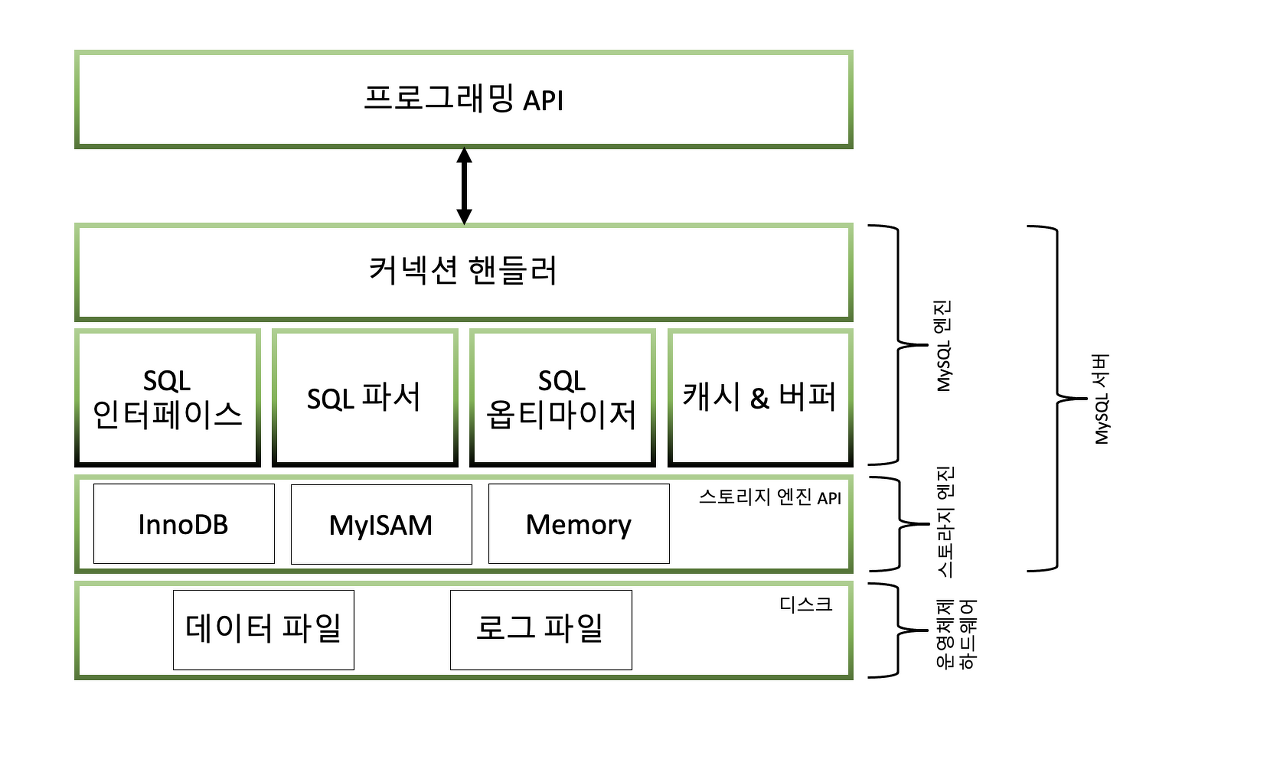

**MySQL 엔진**

- MySQL 엔진은 클라이언트로부터의 접속 및 쿼리 요청을 처리하는 커넥션 핸들러와 SQL 파서 및 전처리기, 쿼리의 최적화된 실행을 위한 옵티마이저가 중심을 이룸.


- MySQL은 표준 SQL(ANSI SQL) 문법을 지원하므로 표준 문법에 따라 작성된 쿼리는 타 DBMS와 호환되어 실행.



**스토리지 엔진**
- 요청된 SQL 문장을 분석하거나 최적화하는 등 DBMS의 두뇌에 해당하는 처리를 수행하고, 실제 데이터를 디스크 스토리지에 저장하거나 디스크 스토리지로부터 데이터를 읽어온다.


- MySQL 서버에서 MySQL 엔진은 하나지만 스토리지 엔진은 여러 개를 동시에 사용 가능
- 아래와 같이 테이블이 사용할 스토리지 엔진을 지정하면 이후 해당 테이블의 모든 읽기 작업이나 변경 작업은 정의된 스토리지 엔진이 처리.

- 스토리지 엔진은 처리 시 최적화를 진행.
  - InnoDB : 키 캐시
  - MyISAM : 버퍼 풀



```sql
CREATE TABLE product (fd1 INT, fd2 INT) ENGINE=INNODB;
```





```md
버퍼 풀과 키 캐시는 각각 다른 목적으로 사용되는 메모리 공간이다.
사용자의 데이터베이스 엔진과 작업 유형에 따라서 버퍼 풀과 키 캐시 중 어느 것이 더 중요한 역할을 하는지 다르다.

InnoDB 스토리지 엔진을 사용하고 대량의 데이터를 처리하는 경우에는 버퍼 풀이 더 중요하다.
반면에 MyISAM 스토리지 엔진을 사용하고 인덱스 검색이 빈번한 경우에는 키 캐시가 더 중요하다.
```



```md
Q. 버퍼 풀은 인덱스도 저장하고 데이터도 저장하는데, 키 캐시를 쓸 필요가 있을까?

A. InnoDB 엔진에서도 인덱스를 버퍼 풀에 저장.
하지만 이 두 방식에 대해서 역시 차이점과 장단점이 존재.

1. 캐시 메모리 사용 방식
키 캐시는 고정 크기의 해시 테이블로 구성.
각각의 인덱스 블록은 해시 테이블 내에 고유한 키 값으로 캐싱.
키 캐시는 LRU(Least Recently Used) 방식을 사용하여 캐시의 사용 빈도에 따라 인덱스 블록을 유지하고 삭제.

버퍼 풀은 가변 크기의 페이지로 구성.
인덱스 블록은 페이지 내에서 고유한 주소(페이지 번호 및 오프셋)로 캐싱.
버퍼 풀은 LRU 방식을 사용하여 페이지의 사용 빈도에 따라 페이지를 유지하고 삭제.

2. 캐시 범위
키 캐시는 MyISAM 스토리지 엔진에서만 사용.
따라서 인덱스 블록 이외의 다른 유형의 데이터에 대한 캐싱을 수행하지 않는다.

InnoDB는 데이터와 인덱스 블록을 모두 캐시 하기 때문에 더 많은 유형의 데이터를 캐싱할 수 있다.

3. 캐시 크기 조절 방법
키 캐시와 버퍼 풀은 모두 MySQL 구성 파일에서 캐시 크기를 조절할 수 있다.
키 캐시의 경우, 캐시 크기를 변경하기 위해서는 MySQL 서버를 재시작해야 한다.
반면, 버퍼 풀은 실행 중에도 캐시 크기를 동적으로 변경할 수 있다.

4. 동시성 제어
키 캐시와 버퍼 풀은 모두 동시성 제어를 위한 기술을 사용한다.
키 캐시는 테이블 단위로 잠금을 유지.
버퍼 풀은 페이지 단위로 잠금을 유지.
이를 통해 다중 사용자 환경에서의 일관성과 안전성을 보장.
```




```md

버퍼 풀과 키 캐시는 각각 다른 목적을 가지고 있다.
버퍼 풀은 데이터 파일에서 읽은 데이터와 인덱스를 캐싱하여 자주 사용되는 데이터를 빠르게 처리하기 위한 목적으로 사용.
키 캐시는 인덱스 데이터의 일부를 메모리에 저장하여 인덱스 데이터의 조회 성능을 향상시키기 위한 목적으로 사용.

버퍼 풀은 모든 데이터를 캐싱하기 때문에 큰 메모리를 가진 서버에서 높은 성능을 보여준다.
인덱스 데이터가 많아질수록 버퍼 풀의 크기를 매우 크게 유지해야 한다.
따라서, 인덱스가 많은 서버에서는 키 캐시를 함께 사용하는 것이 좋다.

키 캐시는 인덱스의 일부만을 메모리에 저장하기 때문에 인덱스의 크기가 크더라도 적은 메모리로도 효과적인 성능을 보여줄 수 있다.
따라서, 인덱스가 많은 서버에서도 상대적으로 적은 메모리로도 인덱스 데이터의 조회 성능을 향상시킬 수 있다.
```



**핸들러 API**

- MySQL 엔진의 쿼리 실행기에서 데이터를 쓰거나 읽어야 할 때는 각 스토리지 엔진에 쓰기 또는 읽기를 요청하는데, 여기서 사용되는 API를 핸들러 API라고 한다.
- InnoDB 스토리지 엔진 또한 이 핸들러 API를 이용해 MySQL 엔진과 데이터를 주고 받는다.


- 핸들러 API를 통해 얼마나 많은 데이터(레코드) 작업이 있었는 지는 SHOW GLOBAL STATUS LIKE 'Handler%'; 명령으로 확인.



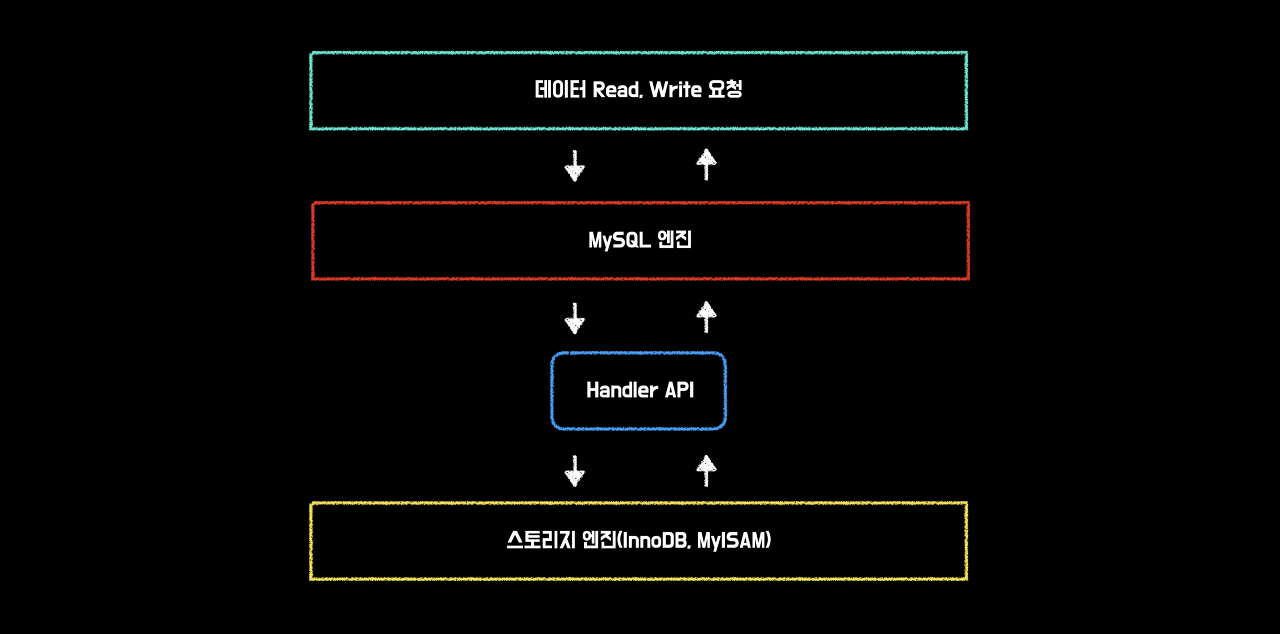

# **MySQL 스레딩 구조**




```md
- 프로세스 기반 방식
프로세스(process)는 운영체제에서 실행 중인 하나의 프로그램을 뜻한다.
각각의 프로세스는 운영체제에서 독립적인 메모리를 할당받고 해당 공간에서 작업을 처리.
하나의 프로세스가 다른 프로세스의 데이터를 변경할 수 없고, 다른 프로세스의 코드를 실행할 수 없다.

운영체제는 각각의 프로세스를 관리하면서, 프로세스 간의 자원 공유, 동기화, 통신 등을 지원.
프로세스는 독립적인 메모리 공간을 사용하기 위해 운영체제는 IPC(Inter-Process Communication)와 같은 메커니즘을 제공하며, 이러한 기능들은 다양한 응용 프로그램에서 활용.



- 스레드 기반 방식
스레드(Thread) 기반 방식은 하나의 프로세스 내에서 여러 개의 스레드가 동시에 작업하는 방식
스레드는 프로세스 내에서 코드를 실행하기 위한 실행 단위이며, 각각의 스레드는 프로세스의 가상 메모리 공간을 공유.

스레드 기반 방식은 멀티코어 CPU에서 더욱 효과적으로 작동할 수 있으며, 응용 프로그램의 성능 향상에 큰 기여
하지만, 스레드 간의 동기화와 데드락(deadlock) 등의 문제도 발생할 수 있으므로, 이러한 문제에 대한 해결책이 필요.



- 프로세스 기반 방식 vs 스레드 기반 방식
프로세스 기반 방식과 스레드 기반 방식의 차이점

자원 사용(스레드 Win): 프로세스는 각각 독립된 메모리 공간을 가지고 실행되며, 프로세스 간의 자원 공유가 어렵고 비용이 크다. 반면, 스레드는 프로세스 내에서 실행되기 때문에, 프로세스의 자원(메모리, 파일 등)을 공유하여 사용할 수 있고, 이를 통해 자원 사용의 효율성이 높아진다.

생성 비용(스레드 Win): 프로세스는 생성할 때 자원 할당, 초기화 등의 작업을 수행해야 하기 때문에 생성 비용이 크다. 스레드는 프로세스 내에서 생성되기 때문에, 프로세스 생성 비용보다 적은 비용으로 생성될 수 있다.

동시성(스레드 Win): 프로세스는 각각 독립된 실행 공간을 가지고 실행되기 때문에, 병렬적으로 실행될 수 있다. 하지만, 프로세스간의 통신이 필요할 때는 별도의 IPC(Inter-Process Communication) 기법이 필요하다. 반면, 스레드는 하나의 프로세스 내에서 실행되는 작은 실행 단위이기 때문에, 스레드 간의 통신이 필요할 때는 공유 메모리 등의 간단한 방법으로 가능하다.

안정성(프로세스 Win): 프로세스는 독립된 메모리 공간을 가지고 실행되기 때문에, 하나의 프로세스가 충돌하더라도 다른 프로세스에는 영향을 미치지 않는다. 반면, 스레드는 하나의 프로세스 내에서 실행되기 때문에, 하나의 스레드가 충돌하면 다른 스레드도 영향을 받을 수 있다.
따라서, 프로세스 기반과 스레드 기반은 각각 자원 사용, 생성 비용, 동시성, 안정성 등의 측면에서 차이가 있다. 둘 중에 뭐가 더 좋고 나쁘고 따질 수는 없으며 프로그램의 목적, 실행 환경, 성능 등을 고려하여 적절한 방식을 선택해야 한다.
```



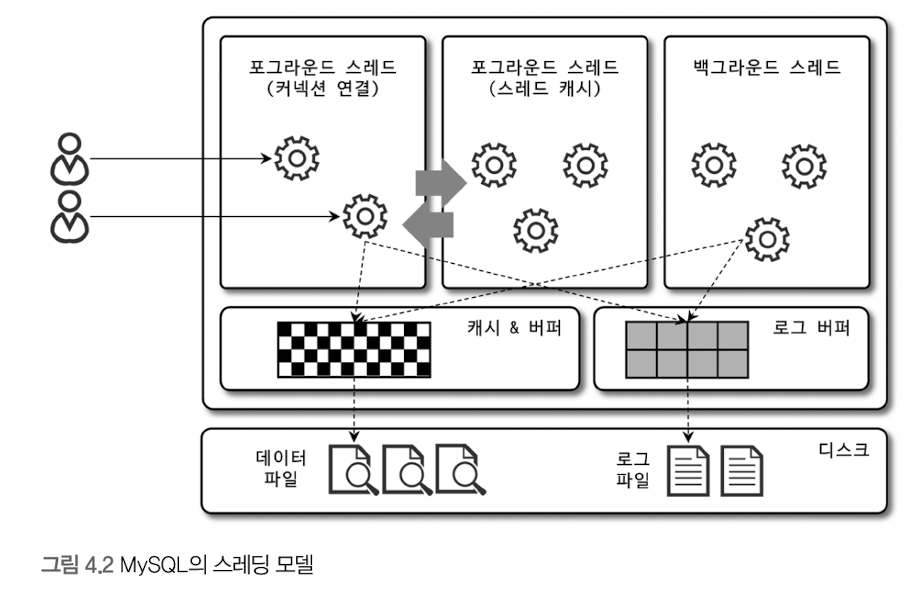

- MySQL 서버는 프로세스 기반이 아니라 스레드 기반으로 작동하며, 크게 포그라운드(Foreground) 스레드와 백그라운드(Background) 스레드로 구분할 수 있다.


- 실행 중인 스레드의 목록은 아래와 같이 performance_schema 데이터베이스의 threads 테이블을 통해 확인할 수 있다.


```sql
SELECT thread_id, name, type, processlist_user, processlist_host FROM performance_schema.threads ORDER BY type, thread_id;
```

- 위 테이블에서 thread/sql/one_connection 스레드만 실제 사용자의 요청을 처리하는 포그라운드 스레드.
- 백그라운드 스레드의 개수는 MySQL 서버의 설정에 따라 가변적일 수 있다.
- 동일한 이름의 스레드가 2개 이상씩 보이는 것은 MySQL 서버의 설정 내용에 의해 여러 스레드가 동일 작업을 병렬로 처리하는 경우.



**포그라운드 스레드 (클라이언트 스레드)**

- 포그라운드 스레드는 MySQL 서버에 접속된 클라이언트의 수만큼 존재하며, 주로 각 클라이언트 사용자가 요청하는 쿼리 문장을 처리.


- 사용자가 작업을 마치고 커넥션을 종료하면, 해당 커넥션을 담당하던 스레드는 다시 스레드 캐시(Thread cache)로 돌아갑니다.

- 이미 스레드 캐시에 일정 개수 이상의 대기 중인 스레드가 있으면, 스레드 캐시에 넣지 않고 스레드를 종료시켜 일정 개수의 스레드만 스레드 캐시에 존재하게 합니다.

- 스레드 캐시에 유지할 수 있는 최대 스레드 개수는 시스템 변수thread_cache_size 로 설정.

- 데이터를 MySQL의 데이터 버퍼나 캐시로부터 가져오며, 버퍼나 캐시에 없는 경우에는 직접 디스크의 데이터나 인덱스 파일로부터 데이터를 읽어와서 작업을 처리한다.

  - InnoDB : READ [테이블은 데이터 버퍼나 캐시까지만 포그라운드 스레드가 처리하고, 나머지 버퍼로부터 디스크까지 기록하는 작업은 백그라운드 스레드가 처리.]
  - MyISAM : READ, WRITE [모두 포그라운드 스레드가 처리.]

.



```md
InnoDB: 포그라운드 스레드가 주로 버퍼 풀에서 데이터를 조회하고 수정하며, 로그 버퍼에 데이터를 저장. 로그 버퍼에서 변경된 데이터를 디스크에 직접 저장하는 작업은 백그라운드 스레드가 담당.

MyISAM:  포그라운드 스레드가 직접 디스크에서 데이터를 읽고 쓰는 작업을 수행. InnoDB에 비해 덜 복잡하고 단순한 작업이지만, 동시성 제어와 데이터 일관성 유지를 위해 테이블 락을 사용해야 하므로 고성능 환경에서는 제한적인 사용이 권장.

InnoDB 엔진은 포그라운드 스레드와 백그라운드 스레드가 협력하여 데이터를 관리하는 구조를 가지고 있습니다.
MyISAM 엔진에서는 InnoDB와 달리 포그라운드 스레드가 디스크에서 직접 데이터를 읽고 쓰는 작업을 수행하며, 백그라운드 스레드는 InnoDB보다 덜 사용.
```


**백그라운드 스레드**

- InnoDB는 아래와 같이 여러 가지 작업이 백그라운드에서 처리.

  - 인서트 버프(Insert Buffer)를 병합하는 스레드
  - 로그를 디스크로 기록하는 스레드
  - InnoDB 버퍼 풀의 데이터를 디스크에 기록하는 스레드
  - 데이터를 버퍼로 읽어 오는 스레드
  - 잠금이나 데드락을 모니터링하는 스레드

<br>

- 중요한 스레드는 로그 스레드(Log Thread)와 버퍼의 데이터를 디스크에 기록(Write Thread)하는 스레드.

- InnoDB는 쓰기 작업을 버퍼링해서 일괄 처리하는 기능이 탑재.

- InnoDB에서도 읽기 작업은 주로 포그라운드 스레드에서 처리되기 때문에, 읽기 스레드는 많이 설정할 필요 없지만, 쓰기 스레드는 아주 많은 작업을 백그라운드로 처리하기 때문에 여유롭게 설정해주는 것이 좋습니다.

- InnoDB에서도 데이터를 읽는 작업은 주로 클라이언트 스레드에서 처리되기 때문에 읽기 스레드는 많이 설정할 필요가 없지만 쓰기 스레드는 아주 많은 작업을 백그라운드로 처리하기 때문에 일반적인 내장 디스크를 사용할 때는 2~4 정도, DAS나 SAN과 같은 스토리지를 사용할 경우 디스크를 최적으로 사용할 수 있을 만큼 사용하는 것이 좋다.


- InnoDB에서는 INSERT, UPDATE, DELETE 쿼리로 데이터가 변경되는 경우 데이터가 디스크의 데이터 파일로 완전히 저장될 때 까지 기다리지 않고 다른 작업을 이어나갈 수 있다.

- MySQL 5.5 버전부터 데이터 쓰기 스레드와 데이터 읽기 스레드의 개수를 2개 이상 지정할 수 있게 되었으며, innodb_write_to_threads와 innodb_read_io_threads 시스템 변수로 스레드의 개수를 설정한다.

- MyISAM에서 일반적인 쿼리는 쓰기 버퍼링 기능을 사용할 수 없다.

- 데이터의 쓰기 작업은 JPA의 쓰기 지연 저장소처럼 지연될 수 있지만, 읽기 작업은 지연될 수 없습니다.

```md
MySQL 5.7 버전부터 쓰기 스레드(innodb_write_to_trehads)의 default value는 4로 변경되었으며, 이전 버전에서 default value는 1이었다.

DAS, SAN은 스토리지 아키텍쳐이며, InnoDB와 MyISAM과 같은 스토리지 엔진과는 별개의 개념이다. 쉽게 생격하면 InnoDB랑 MyISAM 같은 스토리지 엔진을 구성하는 아키텍쳐라고 생각하면 된다.
```



# **메모리 할당 및 사용 구조**

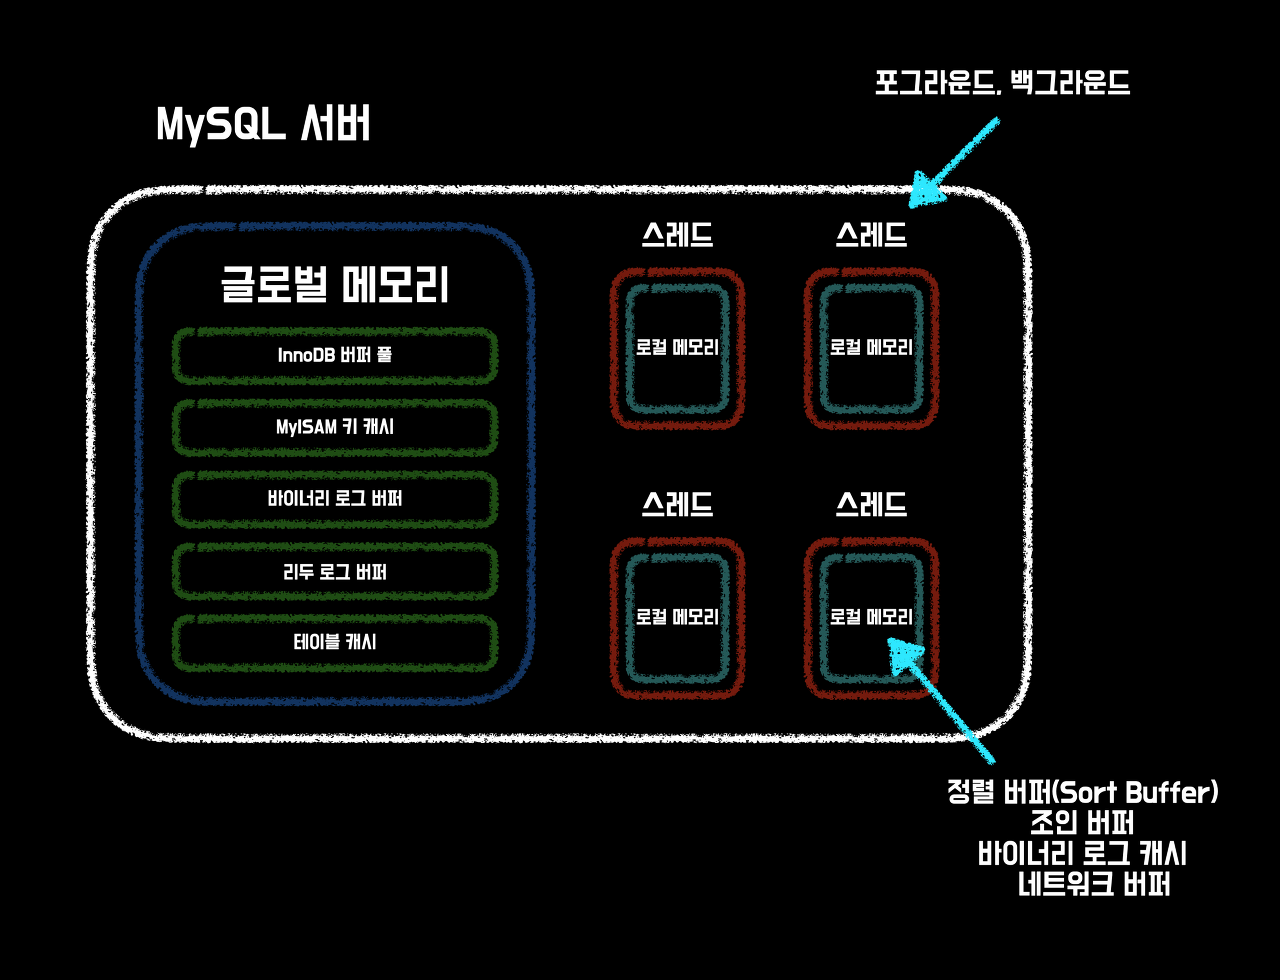

**글로벌 메모리 영역과 로컬 메모리 영역은 MySQL 서버 내에 존재하는 많은 스레드가 공유해서 사용하는 공간인지 여부에 따라 구분.**

<br>

**글로벌 메모리 영역**

- 클라이언트 스레드의 수와 무관하게 하나의 메모리 공간만 할당된다.

- 필요에 의해 2개 이상의 메모리 공간을 할당받을 수도 있지만 클라이언트 스레드 수와는 무관하며, 생성된 글로벌 영역이 N개라 하더라도 모든 스레드에 의해 공유된다.


**대표적인 글로벌 메모리 영역**

- 테이블 캐시
- InnoDB 버퍼 풀
- InnoDB 어댑티브 해시 인덱스
- InnoDB 리두 로그 버퍼

<br>

**로컬 메모리 영역**

- 세션 메모리 영역이라고도 표현하며, MySQL 서버상에 존재하는 클라이언트 스레드가 쿼리를 처리하는 데 사용하는 메모리 영역.


- 로컬 메모리에는 각 스레드가 사용하는 변수, 스레드 상태 정보, 작업 처리 결과 등이 저장된다.
  - 로컬 메모리는 각 스레드에서 동시에 접근 가능하며, 스레드 간의 메모리 충돌과 같은 문제를 방지하기 위해 MySQL 서버는 각 스레드의 로컬 메모리를 관리.

- 사용자가 MySQL 서버에 접속하면, MySQL 서버에서는 클라이언트 커넥션으로부터의 요청을 처리하기 위해 스레드를 하나씩 할당하게 되는데, 클라이언트 스레드(포그라운드 스레드)가 사용하는 메모리 공간이라고 해서 클라이언트 메모리 영역이라고 함.

- MySQL 서버에서는 많은 수의 스레드를 사용하므로, 각 스레드가 사용하는 로컬 메모리 공간이 최소한으로 유지되도록 설계.

- MySQL 서버에서는 스레드의 작업이 완료될 때 로컬 메모리를 해제하고 재사용할 수 있도록 구성되어 있다. 이러한 방식으로 MySQL 서버는 효율적으로 스레드를 관리하며, 안정적인 성능을 제공할 수 있다.

- 로컬 메모리는 각 스레드에서 사용하는 메모리 영역을 의미.
  - MySQL 서버에서는 스레드 간에 공유되는 글로벌 메모리와 별개로, 각 스레드가 실행되는 동안 해당 스레드가 사용하는 로컬 메모리 공간을 가지고 있다.


- MySQL 서버는 클라이언트가 접속하면 요청을 처리하기 위해 스레드를 하나씩 할당하게 되는데, 이 스레드는 각 클라이언트별로 독립적으로 할당되며 절대 공유되지 않는다는 특징.


- 로컬 메모리 공간의 또 한 가지 중요한 특징은 각 쿼리의 용도별로 필요할 때만 공간이 할당되고 필요하지 않은 경우에는 MySQL이 메모리 공간을 할당조차도 하지 않을 수도 있다는 점.
  - 커넥션이 열려 있는 동안 계속 할당된 상태로 남아 있는 공간(커넥션 버퍼나 결과 버퍼)도 있고, 쿼리를 실행하는 순간에만 할당했다가 다시 해제하는 공간(소트 버퍼나 조인 버퍼)도 있다.


**대표적인 로컬 메모리 영역**

- 정렬 버퍼(Sort buffer)
- 조인 버퍼
- 바이너리 로그 캐시
- 네트워크 버퍼



**커넥션이 열려있는 동안 계속 할당된 상태로 남아있는 공간**

- 커넥션 버퍼
- 결과 버퍼

**쿼리를 실행하는 순간에만 할당했다가 해제되는 공간**
- 조인 버퍼
- 소트 버퍼




```md
Q. 어떻게 각 스레드가 로컬 메모리에 접근이 가능할까?
A. 로컬 메모리는 각 스레드별로 독립적으로 할당되는 메모리 영역이기 때문에, 해당 스레드만 접근할 수 있다. 다른 스레드에서는 직접 접근할 수 없고, 해당 스레드에서 제공하는 API나 인터페이스를 통해서 간접적으로 접근할 수 있다.

Q. 그럼 로컬 메모리를 공유하면 생기는 문제점이 뭘까?
A. API나 인터페이스를 사용할 때는 추가적인 오버헤드가 발생하며, 이로 인해 애플리케이션의 성능이 저하될 수 있다. 또한, API나 인터페이스를 사용하면 로컬 메모리가 글로벌 메모리처럼 공유된다.

때문에 다른 스레드에 의해 데이터가 변경될 가능성이 있어서, 이에 대한 처리를 추가적으로 해줘야 한다. 그래서, 로컬 메모리를 적절하게 사용하면서 필요한 경우에만 API나 인터페이스를 사용하는 것이 좋다.
```



# **플러그인 스토리지 엔진 모델**

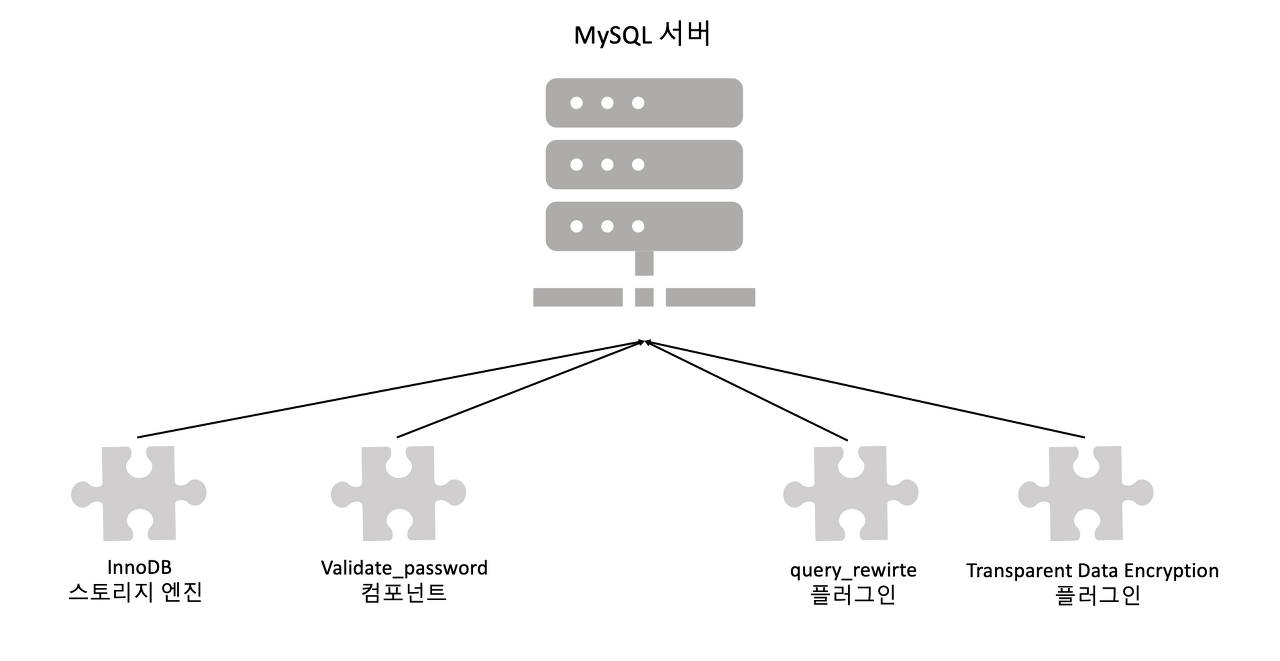

- MySQL은 이미 기본적으로 많은 스토리지 엔진을 가지고 있다.
- 기본적으로 제공되는 스토리지 엔진 이외에 부가적인 기능을 더 제공하는 스토리지 엔진이 필요하다면, 필요한 요건을 기초로 다른 전문 개발 회사 또는 사용자가 직접 스토리지 엔진을 개발하는 것도 가능.

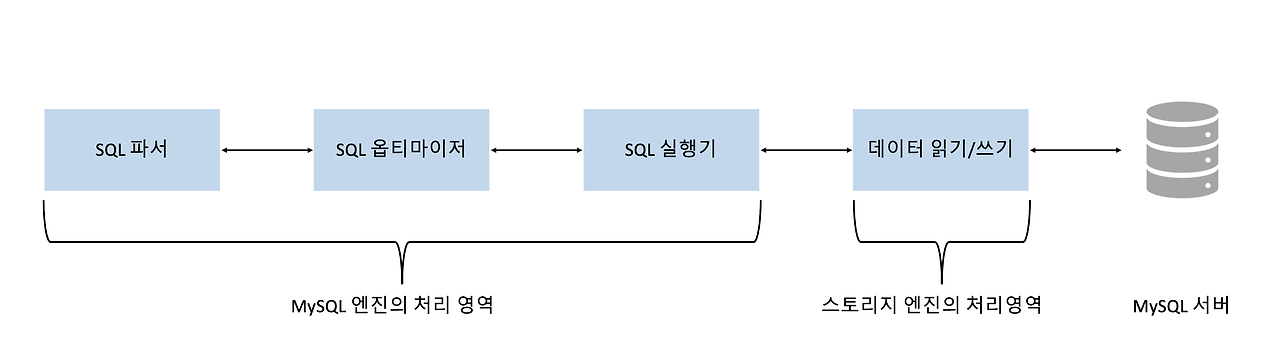

- MySQL에서 쿼리가 실행되는 과정에서 거의 대부분의 작업이 MySQL 엔진에서 처리되고, 마지막 "데이터읽기/쓰기" 작업만 스토리지 엔진에 의해 처리.
- 사용자가 새로운 용도의 스토리지 엔진을 만든다 하더라도 DBMS의 전체 기능이 아닌 일부분의 기능만 수행하는 엔진을 작성하게 된다는 의미이기도 하다.




**컴포넌트**

- MySQL 8.0부터는 아래의 기존 MySQL 서버의 플러그인 단점을 보완해서 컴포넌트로 구현.

  - 플러그인은 오직 MySQL 서버와 인터페이스할 수 있고, 플러그인끼리는 통신할 수 없음
  - 플러그인은 MySQL 서버의 변수나 함수를 직접 호출하기 때문에 안전하지 않음(캡슐화 안 됨)
  - 플러그인은 상호 의존 관계를 설정할 수 없어서 초기화가 어려움


# **쿼리 실행 구조**


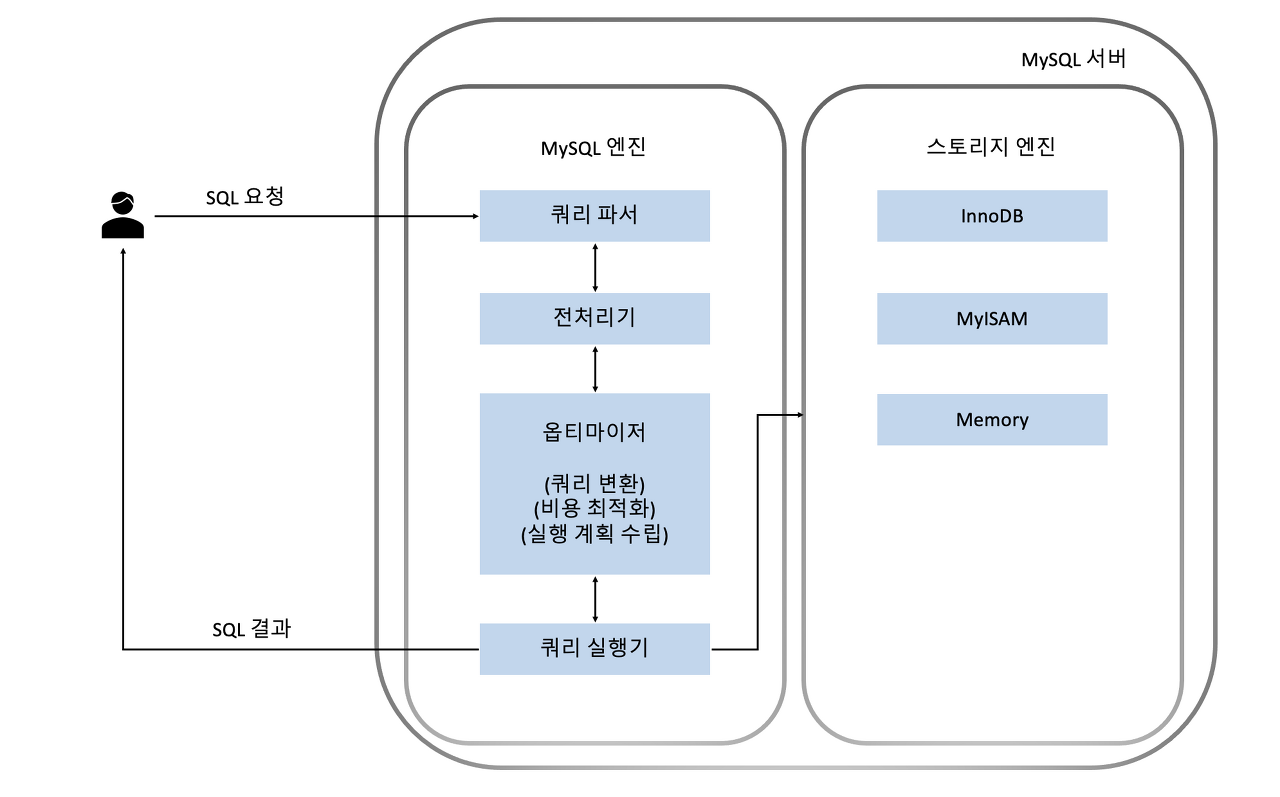

- MySQL에서 쿼리가 실행되는 과정을 위의 그림처럼 간략하게 표현.
  - 대부분의 작업이 MySQL 엔진에서 처리되고, ‘데이터 읽기/쓰기’ 만 스토리지 엔진에 의해 처리.

- MySQL 서버에서 MySQL 엔진은 사람 역할을 하고, 각 스토리지 엔진은 자동차 역할을 하는데, MySQL 엔진이 스토리지 엔진을 조정하기 위해 핸들러라는 것을 사용.

- MySQL 엔진이 각 스토리지 엔진에게 데이터를 읽어오거나 저장하도록 명령하려면 무조건 핸들러를 통해야 함.

- 핸들러라는 의미는 MySQL 서버의 소스코드로부터 넘어온 개념.
  - 자동차에 비유하면, 사람이 핸들(운전대)를 이용해 자동차를 운전하듯 프로그래밍 언어에선 어떤 기능을 호출하기 위해 사용하는 운전대와 같은 역할을 하는 객체를 핸들러라고 함

- 실질적인 GROUP BY나 ORDER BY 등 복잡한 처리는 스토리지 엔진 영역이 아니라, MySQL 엔진의 처리영역인 ‘쿼리 실행기’ 에서 처리.

- 하나의 쿼리 작업은 여러 하위 작업으로 나뉘는데, 각 하위 작업이 MySQL 엔진 영역에서 처리되는지 아니면 스토리지 엔진 영역에서 처리되는지 구분할 줄 알아야 한다는 점




**쿼리 파서**

- 쿼리 파서는 사용자 요청으로 들어온 쿼리 문장을 토큰(MySQL이 인식할 수 있는 최소 단위의 어휘나 기호)으로 분리해 트리 형태의 구조로 만들어 내는 작업을 한다.
- 쿼리 문장의 기본 문법 오류는 이 과정에서 발견되고 사용자에게 오류 메시지를 전달하게 된다.


**전처리기**

- 파서 과정에서 만들어진 파서 트리를 기반으로 쿼리 문장에 구조적인 문제점이 있는지 확인.
- 각 토큰을 테이블 이름이나 칼럼 이름, 또는 내장 함수와 같은 개체를 매핑해 해당 객체의 존재 여부와 객체의 접근 권한 등을 확인하는 과정을 이 단계에서 수행.


**옵티마이저**

- 사용자의 요청으로 들어온 쿼리 문장을 저렴한 비용으로 가장 빠르게 처리하기 위해 결정하는 역할을 담당하며, DBMS의 두뇌에 해당한다고 볼 수 있다.


**실행 엔진**

- 실행 엔진은 만들어진 계획대로 각 핸들러에게 요청해서 받은 결과를 또 다른 핸들러 요청의 입력으로 연결하는 역할을 수행.

- 아래는 옵티마이저가 GROUP BY를 처리하기 위해 임시 테이블을 사용하기로 결정한 예.

  - 실행 엔진이 핸들러에게 임시 테이블을 만들라고 요청
  - 다시 실행 엔진은 WHERE 절에 일치하는 레코드를 읽어오라고 핸들러에게 요청
  - 읽어온 레코드들을 1번에서 준비한 임시 테이블에 저장하라고 다시 핸들러에게 요청
  - 데이터가 준비된 임시 테이블에서 필요한 방식으로 데이터를 읽어오라고 핸들러에게 다시 요청
  - 최종적으로 실행 엔진은 결과를 사용자나 다른 모듈로 넘김

**핸들러 (스토리지 엔진)**

- MySQL 서버의 가장 밑단에서 MySQL 실행 엔진의 요쳥에 따라 데이터를 디스크로 저장하고, 디스크로부터 읽어 오는 역할을 담당.


- 핸들러는 결국 스토리지 엔진을 의미하며, MyISAM 테이블을 조작하는 경우에는 MyISAM 스토리지 엔진이 핸들러가 되고, InnoDB 테이블을 조작하는 경우에는 InnoDB 스토리지 엔진이 핸들러가 된다.




**쿼리 캐시**

- 쿼리 캐시는 SQL의 실행 결과를 메모리에 캐시하고, 동일 SQL 쿼리가 실행되면 데이터를 읽지 않고 즉시 결과를 반환하기 때문에 매우 빠른 성능을 보였다
-  쿼리 캐시는 테이블의 데이터가 변경되면 캐시에 저장된 결과 중에서 변경된 테이블과 관련된 것들을 모두 삭제해야 했기 때문에 심각한 동시 처리 성능 저하를 유발.

- MySQL 8.0으로 올라오면서 쿼리 캐시는 MySQL 서버의 기능에서 완전히 제거되고, 관련된 시스템 변수도 모두 제거 됐다.

